In [1]:
#In this assignment, you'll create a Python script to perform a sentiment analysis
#of the Twitter activity of various news outlets, and to present your findings visually.
#Your final output should provide a visualized summary of the sentiments expressed in 
#Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.
#The tools of the trade you will need for your task as a data analyst include the following:
#tweepy, pandas, matplotlib, and VADER.
#You must use the Matplotlib or Pandas plotting libraries.

# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Your final Jupyter notebook must:
#Pull last 100 tweets from each outlet.
#Perform a sentiment analysis with the compound, positive, neutral, and negative scoring 
#for each tweet.

# Target Search Term
#BBC, CBS, CNN, Fox, and New York times.
target_users = ("@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes")

# List to hold results
sentiments = []

# Loop through all target users
for user in target_users:
    
    #Set counter
    counter = 0

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # get tweets from user timelines
    public_tweets = api.user_timeline(user, count = 100, result_type="recent")

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_text = tweet["text"]
        tweets_ago = counter
        
        #add to sentiment list
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})

        counter = counter + 1
        
    # Print the Sentiments
    print(sentiments)
    print()  

[{'User': '@BBC', 'Date': 'Fri Oct 05 19:04:05 +0000 2018', 'Compound': -0.8074, 'Positive': 0.0, 'Negative': 0.356, 'Neutral': 0.644, 'Tweets Ago': 0, 'Tweet Text': 'Follow some of the debt counsellors working for Christians Against Poverty.\n\nThe Debt Saviours | 9pm | @BBCTwo |… https://t.co/t0c5uwl4jk'}, {'User': '@BBC', 'Date': 'Fri Oct 05 18:08:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 1, 'Tweet Text': '💪🐔 Check out these miniature chicken bodybuilders. https://t.co/rfRrfZMVkM'}, {'User': '@BBC', 'Date': 'Fri Oct 05 17:03:08 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2, 'Tweet Text': "John Humphrys presents the first heat of the series as the hunt for the nation's Mastermind gets back underway.… https://t.co/hQdf779Yeo"}, {'User': '@BBC', 'Date': 'Fri Oct 05 16:05:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 3, 'Tweet Text':

[{'User': '@BBC', 'Date': 'Fri Oct 05 19:04:05 +0000 2018', 'Compound': -0.8074, 'Positive': 0.0, 'Negative': 0.356, 'Neutral': 0.644, 'Tweets Ago': 0, 'Tweet Text': 'Follow some of the debt counsellors working for Christians Against Poverty.\n\nThe Debt Saviours | 9pm | @BBCTwo |… https://t.co/t0c5uwl4jk'}, {'User': '@BBC', 'Date': 'Fri Oct 05 18:08:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 1, 'Tweet Text': '💪🐔 Check out these miniature chicken bodybuilders. https://t.co/rfRrfZMVkM'}, {'User': '@BBC', 'Date': 'Fri Oct 05 17:03:08 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2, 'Tweet Text': "John Humphrys presents the first heat of the series as the hunt for the nation's Mastermind gets back underway.… https://t.co/hQdf779Yeo"}, {'User': '@BBC', 'Date': 'Fri Oct 05 16:05:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 3, 'Tweet Text':

[{'User': '@BBC', 'Date': 'Fri Oct 05 19:04:05 +0000 2018', 'Compound': -0.8074, 'Positive': 0.0, 'Negative': 0.356, 'Neutral': 0.644, 'Tweets Ago': 0, 'Tweet Text': 'Follow some of the debt counsellors working for Christians Against Poverty.\n\nThe Debt Saviours | 9pm | @BBCTwo |… https://t.co/t0c5uwl4jk'}, {'User': '@BBC', 'Date': 'Fri Oct 05 18:08:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 1, 'Tweet Text': '💪🐔 Check out these miniature chicken bodybuilders. https://t.co/rfRrfZMVkM'}, {'User': '@BBC', 'Date': 'Fri Oct 05 17:03:08 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2, 'Tweet Text': "John Humphrys presents the first heat of the series as the hunt for the nation's Mastermind gets back underway.… https://t.co/hQdf779Yeo"}, {'User': '@BBC', 'Date': 'Fri Oct 05 16:05:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 3, 'Tweet Text':

[{'User': '@BBC', 'Date': 'Fri Oct 05 19:04:05 +0000 2018', 'Compound': -0.8074, 'Positive': 0.0, 'Negative': 0.356, 'Neutral': 0.644, 'Tweets Ago': 0, 'Tweet Text': 'Follow some of the debt counsellors working for Christians Against Poverty.\n\nThe Debt Saviours | 9pm | @BBCTwo |… https://t.co/t0c5uwl4jk'}, {'User': '@BBC', 'Date': 'Fri Oct 05 18:08:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 1, 'Tweet Text': '💪🐔 Check out these miniature chicken bodybuilders. https://t.co/rfRrfZMVkM'}, {'User': '@BBC', 'Date': 'Fri Oct 05 17:03:08 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2, 'Tweet Text': "John Humphrys presents the first heat of the series as the hunt for the nation's Mastermind gets back underway.… https://t.co/hQdf779Yeo"}, {'User': '@BBC', 'Date': 'Fri Oct 05 16:05:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 3, 'Tweet Text':

[{'User': '@BBC', 'Date': 'Fri Oct 05 19:04:05 +0000 2018', 'Compound': -0.8074, 'Positive': 0.0, 'Negative': 0.356, 'Neutral': 0.644, 'Tweets Ago': 0, 'Tweet Text': 'Follow some of the debt counsellors working for Christians Against Poverty.\n\nThe Debt Saviours | 9pm | @BBCTwo |… https://t.co/t0c5uwl4jk'}, {'User': '@BBC', 'Date': 'Fri Oct 05 18:08:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 1, 'Tweet Text': '💪🐔 Check out these miniature chicken bodybuilders. https://t.co/rfRrfZMVkM'}, {'User': '@BBC', 'Date': 'Fri Oct 05 17:03:08 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2, 'Tweet Text': "John Humphrys presents the first heat of the series as the hunt for the nation's Mastermind gets back underway.… https://t.co/hQdf779Yeo"}, {'User': '@BBC', 'Date': 'Fri Oct 05 16:05:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 3, 'Tweet Text':

In [3]:
#Pull into a DataFrame the tweet's source account, its text, its date, and its compound, 
#positive, neutral, and negative sentiment scores.
news_df = pd.DataFrame.from_dict(sentiments)
news_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.8074,Fri Oct 05 19:04:05 +0000 2018,0.356,0.644,0.000,Follow some of the debt counsellors working fo...,0,@BBC
1,0.0000,Fri Oct 05 18:08:03 +0000 2018,0.000,1.000,0.000,💪🐔 Check out these miniature chicken bodybuild...,1,@BBC
2,0.0000,Fri Oct 05 17:03:08 +0000 2018,0.000,1.000,0.000,John Humphrys presents the first heat of the s...,2,@BBC
3,0.0000,Fri Oct 05 16:05:04 +0000 2018,0.000,1.000,0.000,FACT: Britons can only let go emotionally when...,3,@BBC
4,0.3612,Fri Oct 05 15:32:37 +0000 2018,0.000,0.872,0.128,RT @1Xtra: .@RayBLK_'s #LiveLounge cover of 'A...,4,@BBC


In [4]:
#Export the data in the DataFrame into a CSV file.
news_df.to_csv("news_sentiments", index=False)

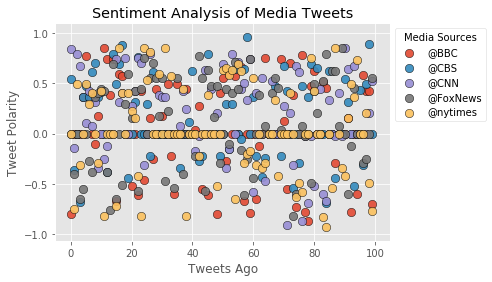

In [9]:
#The first plot will be and/or feature the following:
#Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization,
#ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most 
#negative sentiment possible, and +1 the most positive sentiment possible.
#Each plot point will reflect the compound sentiment of a tweet.
#Sort each plot point by its relative timestamp.

for user in target_users:
    news_df2 = news_df.loc[news_df["User"] == user]
    ax = plt.scatter(news_df2["Tweets Ago"],news_df2["Compound"],label = user, s=70, edgecolors = "black", alpha = .9)

#Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#grid, legend
#plt.grid()
plt.legend(loc='best', bbox_to_anchor=(.3, 0, 1, 1), title = "Media Sources", facecolor = "white")
plt.xlim(-5, 105)
plt.yticks(np.arange(-1, 1.1, step=0.5))
#ax.set_facecolor("white")


#Save PNG images for each plot.
plt.savefig("Sentiment_Analysis_Media_Tweets.png")

plt.show()

In [13]:
news_df3 = pd.DataFrame.from_dict(sentiments)
avg_news = news_df3.groupby("User")["Compound"].mean()
avg_news

User
@BBC        0.043719
@CBS        0.135979
@CNN        0.154425
@FoxNews    0.088998
@nytimes    0.038311
Name: Compound, dtype: float64

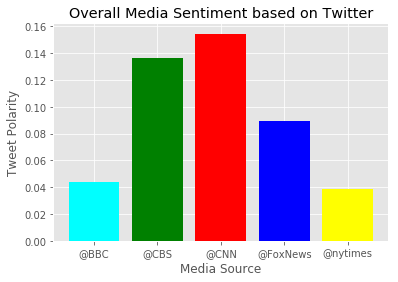

In [14]:
#The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. 
#For this plot, you will again aggregate the compound sentiments analyzed by VADER.
x_axis = np.arange(len(avg_news))
plt.bar(x_axis, avg_news, color=['cyan', 'green', 'red', 'blue', 'yellow'])

#Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

#xaxis tick mark labels
plt.xticks((0,1,2,3,4), target_users)

#add amount to each bar and round to 2 decimals
#plt.barh.xticklabels(avg_news)

#Save PNG images for each plot.
plt.savefig("Overall_Media_Sentiment_based_on_Twitter.png")

plt.show()